In [5]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fastf1.Cache.enable_cache('../data/cache')

print("Setup complete!")

Setup complete!


In [6]:
# Load 2024 season schedule
season = fastf1.get_event_schedule(2024)
print(f"2024 has {len(season)} races")
print("\nFirst 10 races:")
print(season[['RoundNumber', 'EventName', 'Location', 'Country']].head(10))

2024 has 25 races

First 10 races:
   RoundNumber                  EventName   Location        Country
0            0         Pre-Season Testing     Sakhir        Bahrain
1            1         Bahrain Grand Prix     Sakhir        Bahrain
2            2   Saudi Arabian Grand Prix     Jeddah   Saudi Arabia
3            3      Australian Grand Prix  Melbourne      Australia
4            4        Japanese Grand Prix     Suzuka          Japan
5            5         Chinese Grand Prix   Shanghai          China
6            6           Miami Grand Prix      Miami  United States
7            7  Emilia Romagna Grand Prix      Imola          Italy
8            8          Monaco Grand Prix     Monaco         Monaco
9            9        Canadian Grand Prix   Montréal         Canada


In [7]:
# Load the Bahrain race (first race of 2024)
print("Loading Bahrain 2024 race data...")
race = fastf1.get_session(2024, 'Bahrain', 'R')  # 'R' = Race
race.load()  # This will take ~30 seconds the first time

print(f"\n✓ Loaded: {race.event['EventName']}")
print(f"Date: {race.event['EventDate']}")
print(f"Winner: {race.results.iloc[0]['Abbreviation']} ({race.results.iloc[0]['TeamName']})")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Loading Bahrain 2024 race data...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']



✓ Loaded: Bahrain Grand Prix
Date: 2024-03-02 00:00:00
Winner: VER (Red Bull Racing)


In [8]:
# Get the full race results
results = race.results

# Show top 10 finishers
print("Top 10 finishers:\n")
print(results[['Position', 'Abbreviation', 'TeamName', 'GridPosition', 'Points']].head(10))

Top 10 finishers:

    Position Abbreviation         TeamName  GridPosition  Points
1        1.0          VER  Red Bull Racing           1.0    26.0
11       2.0          PER  Red Bull Racing           5.0    18.0
55       3.0          SAI          Ferrari           4.0    15.0
16       4.0          LEC          Ferrari           2.0    12.0
63       5.0          RUS         Mercedes           3.0    10.0
4        6.0          NOR          McLaren           7.0     8.0
44       7.0          HAM         Mercedes           9.0     6.0
81       8.0          PIA          McLaren           8.0     4.0
14       9.0          ALO     Aston Martin           6.0     2.0
18      10.0          STR     Aston Martin          12.0     1.0


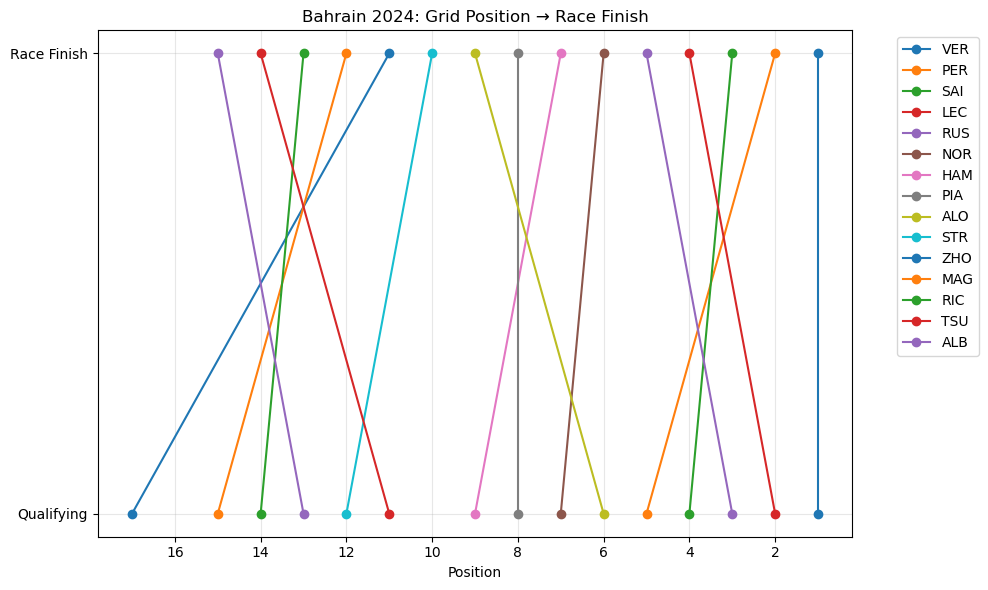

In [9]:
# Compare qualifying position vs race finish
plt.figure(figsize=(10, 6))

# Plot each driver
for idx, row in results.head(15).iterrows():
    plt.plot([row['GridPosition'], row['Position']], 
             [0, 1], 
             marker='o', 
             label=row['Abbreviation'])
    
plt.yticks([0, 1], ['Qualifying', 'Race Finish'])
plt.xlabel('Position')
plt.title('Bahrain 2024: Grid Position → Race Finish')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Position 1 on the left
plt.tight_layout()
plt.show()

In [10]:
# Let's load the first 5 races of 2024
races_to_load = ['Bahrain', 'Saudi Arabia', 'Australia', 'Japan', 'China']

all_results = []

for race_name in races_to_load:
    print(f"Loading {race_name}...")
    session = fastf1.get_session(2024, race_name, 'R')
    session.load()
    
    # Get results and add race name
    results = session.results.copy()
    results['RaceName'] = race_name
    all_results.append(results)
    
# Combine all results
df = pd.concat(all_results, ignore_index=True)

print(f"\n✓ Loaded {len(df)} driver results across {len(races_to_load)} races")
print(f"\nSample data:")
print(df[['RaceName', 'Abbreviation', 'TeamName', 'GridPosition', 'Position']].head(10))

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Loading Bahrain...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...


Loading Saudi Arabia...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['10']
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching t

Loading Australia...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Loading Japan...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Loading China...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t


✓ Loaded 99 driver results across 5 races

Sample data:
  RaceName Abbreviation         TeamName  GridPosition  Position
0  Bahrain          VER  Red Bull Racing           1.0       1.0
1  Bahrain          PER  Red Bull Racing           5.0       2.0
2  Bahrain          SAI          Ferrari           4.0       3.0
3  Bahrain          LEC          Ferrari           2.0       4.0
4  Bahrain          RUS         Mercedes           3.0       5.0
5  Bahrain          NOR          McLaren           7.0       6.0
6  Bahrain          HAM         Mercedes           9.0       7.0
7  Bahrain          PIA          McLaren           8.0       8.0
8  Bahrain          ALO     Aston Martin           6.0       9.0
9  Bahrain          STR     Aston Martin          12.0      10.0
